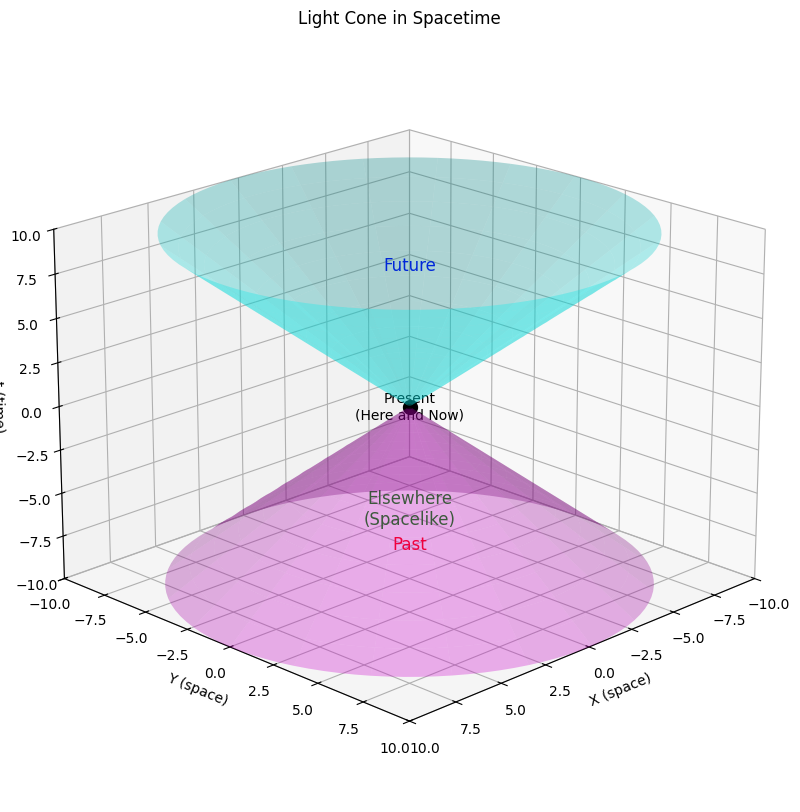

In [20]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Set up the 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Generate data for the light cone
t = np.linspace(-10, 10, 100)
theta = np.linspace(0, 2 * np.pi, 100)
t_grid, theta_grid = np.meshgrid(t, theta)

# Cone equation: x^2 + y^2 = t^2. We use radius r = |t|.
r = np.abs(t_grid)
x = r * np.cos(theta_grid)
y = r * np.sin(theta_grid)

# --- FIX: Create masked Z-arrays for future and past cones ---
# For the future cone, hide the past (t < 0) by replacing it with nan
t_future = np.where(t_grid >= 0, t_grid, np.nan)
# For the past cone, hide the future (t > 0) by replacing it with nan
t_past = np.where(t_grid <= 0, t_grid, np.nan)

# Plot the surfaces of the future and past light cones
# Future cone (t > 0)
ax.plot_surface(
    x, y, t_future,  # Use the masked future Z-array
    alpha=0.3, color='cyan', rstride=5, cstride=5
)
# Past cone (t < 0)
ax.plot_surface(
    x, y, t_past,    # Use the masked past Z-array
    alpha=0.3, color='magenta', rstride=5, cstride=5
)


# --- Add Labels and Arrows ---

# Set axis labels
ax.set_xlabel('X (space)')
ax.set_ylabel('Y (space)')
ax.set_zlabel('t (time)')

# Set plot limits
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])

# Add labels for regions
ax.text(0, 0, 8, 'Future', color='blue', ha='center', va='center', fontsize=12)
ax.text(0, 0, -8, 'Past', color='red', ha='center', va='center', fontsize=12)
ax.text(0, 0, 0, 'Present\n(Here and Now)', color='black', ha='center', va='center', fontsize=10)
# Add label for the "Elsewhere" region (spacelike separation)
ax.text(8, 8, 0, 'Elsewhere\n(Spacelike)', color='green', ha='center', va='center', fontsize=12)

# Make the origin (present) more visible
ax.scatter([0], [0], [0], color='black', s=100, label='The Present Event')

# Set the viewing angle for better perspective
ax.view_init(elev=20, azim=45)
# --- SAVE THE FIGURE AS A .TIF FILE ---
os.makedirs('Ch1', exist_ok=True)
# Add this line before plt.show()
plt.savefig('Ch1/light_cone.svgz', format='svgz', dpi=300)
# Add a title to the plot
plt.title('Light Cone in Spacetime')

# Display the plot
plt.show()